In [1]:
%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import cos, sin, pi
from statistics import mean
import os.path

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
dim = 200

def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(40))
    model.add(Activation('relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dense(6))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [2]:
SP = np.genfromtxt('DATA/DATA2X.txt')
SH = np.genfromtxt('DATA/DATA2Y.txt')

In [3]:
SP.shape

(7, 200)

In [4]:
for i in range(3, 50):
    if os.path.exists('DATA/DATA'+str(i)+'X.txt'):
        tmp = np.genfromtxt('DATA/DATA'+str(i)+'X.txt')
        print(i, len(tmp))
        SP = np.concatenate((SP, tmp))
        tmp = np.genfromtxt('DATA/DATA'+str(i)+'Y.txt')
        print(i, len(tmp))
        SH = np.concatenate((SH, tmp))
print('Total # of data: ' + str(len(SP)))

3 6
3 6
4 12
4 12
5 5
5 5
9 5
9 5
10 14
10 14
14 36
14 36
17 5
17 5
18 13
18 13
19 12
19 12
21 13
21 13
22 36
22 36
33 5
33 5
34 14
34 14
35 14
35 14
36 21
36 21
37 13
37 13
38 32
38 32
39 12
39 12
41 13
41 13
42 33
42 33
43 28
43 28
45 27
45 27
49 13
49 13
Total # of data: 389


In [5]:
DATA = np.append(SP, SH, axis = 1)
np.random.shuffle(DATA)

X = DATA[:, :200]
Y = DATA[:,200:]

train_size = int(len(DATA) * 0.8)

train_X = X[0:train_size, :]
train_Y = Y[0:train_size, :]
test_X = X[train_size:, :]
test_Y = Y[train_size:, :]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 311 samples, validate on 78 samples
Epoch 1/500
 - 2s - loss: 0.0336 - acc: 0.1061 - val_loss: 0.0209 - val_acc: 0.1282
Epoch 2/500
 - 0s - loss: 0.0165 - acc: 0.0836 - val_loss: 0.0167 - val_acc: 0.1282
Epoch 3/500
 - 0s - loss: 0.0140 - acc: 0.0836 - val_loss: 0.0161 - val_acc: 0.1282
Epoch 4/500
 - 0s - loss: 0.0143 - acc: 0.1415 - val_loss: 0.0160 - val_acc: 0.1410
Epoch 5/500
 - 0s - loss: 0.0137 - acc: 0.1640 - val_loss: 0.0157 - val_acc: 0.1282
Epoch 6/500
 - 0s - loss: 0.0129 - acc: 0.1222 - val_loss: 0.0156 - val_acc: 0.1410
Epoch 7/500
 - 0s - loss: 0.0130 - acc: 0.1318 - val_loss: 0.0155 - val_acc: 0.1538
Epoch 8/500
 - 0s - loss: 0.0135 - acc: 0.2315 - val_loss: 0.0154 - val_acc: 0.1410
Epoch 9/500
 - 0s - loss: 0.0128 - acc: 0.1350 - val_loss: 0.0152 - val_acc: 0.1410
Epoch 10/500
 - 0s - loss: 0.0126 - acc: 0.1511 - val_loss: 0.0165 - val_acc: 0

Epoch 90/500
 - 0s - loss: 0.0040 - acc: 0.2154 - val_loss: 0.0084 - val_acc: 0.1795
Epoch 91/500
 - 0s - loss: 0.0036 - acc: 0.1768 - val_loss: 0.0072 - val_acc: 0.1795
Epoch 92/500
 - 0s - loss: 0.0034 - acc: 0.1961 - val_loss: 0.0071 - val_acc: 0.2692
Epoch 93/500
 - 0s - loss: 0.0042 - acc: 0.2572 - val_loss: 0.0071 - val_acc: 0.1923
Epoch 94/500
 - 0s - loss: 0.0034 - acc: 0.1865 - val_loss: 0.0102 - val_acc: 0.1923
Epoch 95/500
 - 0s - loss: 0.0048 - acc: 0.1961 - val_loss: 0.0077 - val_acc: 0.2308
Epoch 96/500
 - 0s - loss: 0.0034 - acc: 0.2154 - val_loss: 0.0073 - val_acc: 0.2564
Epoch 97/500
 - 0s - loss: 0.0032 - acc: 0.2412 - val_loss: 0.0082 - val_acc: 0.2308
Epoch 98/500
 - 0s - loss: 0.0035 - acc: 0.2701 - val_loss: 0.0071 - val_acc: 0.1795
Epoch 99/500
 - 0s - loss: 0.0032 - acc: 0.2026 - val_loss: 0.0077 - val_acc: 0.2179
Epoch 100/500
 - 0s - loss: 0.0036 - acc: 0.2026 - val_loss: 0.0079 - val_acc: 0.2179
Epoch 101/500
 - 0s - loss: 0.0030 - acc: 0.2090 - val_loss: 0.0

Epoch 186/500
 - 0s - loss: 0.0025 - acc: 0.2958 - val_loss: 0.0071 - val_acc: 0.2051
Epoch 187/500
 - 0s - loss: 0.0024 - acc: 0.2958 - val_loss: 0.0071 - val_acc: 0.3205
Epoch 188/500
 - 0s - loss: 0.0023 - acc: 0.2958 - val_loss: 0.0070 - val_acc: 0.2308
Epoch 189/500
 - 0s - loss: 0.0024 - acc: 0.2862 - val_loss: 0.0077 - val_acc: 0.2821
Epoch 190/500
 - 0s - loss: 0.0023 - acc: 0.3087 - val_loss: 0.0071 - val_acc: 0.3205
Epoch 191/500
 - 0s - loss: 0.0022 - acc: 0.3441 - val_loss: 0.0074 - val_acc: 0.1923
Epoch 192/500
 - 0s - loss: 0.0025 - acc: 0.3119 - val_loss: 0.0065 - val_acc: 0.2436
Epoch 193/500
 - 0s - loss: 0.0022 - acc: 0.3280 - val_loss: 0.0070 - val_acc: 0.2692
Epoch 194/500
 - 0s - loss: 0.0023 - acc: 0.3055 - val_loss: 0.0068 - val_acc: 0.3333
Epoch 195/500
 - 0s - loss: 0.0023 - acc: 0.3023 - val_loss: 0.0075 - val_acc: 0.2821
Epoch 196/500
 - 0s - loss: 0.0024 - acc: 0.3183 - val_loss: 0.0071 - val_acc: 0.2692
Epoch 197/500
 - 0s - loss: 0.0024 - acc: 0.3698 - val

Epoch 282/500
 - 0s - loss: 0.0022 - acc: 0.3215 - val_loss: 0.0078 - val_acc: 0.2821
Epoch 283/500
 - 0s - loss: 0.0026 - acc: 0.3248 - val_loss: 0.0072 - val_acc: 0.2179
Epoch 284/500
 - 0s - loss: 0.0026 - acc: 0.2990 - val_loss: 0.0075 - val_acc: 0.2564
Epoch 285/500
 - 0s - loss: 0.0023 - acc: 0.2990 - val_loss: 0.0076 - val_acc: 0.2564
Epoch 286/500
 - 0s - loss: 0.0020 - acc: 0.2830 - val_loss: 0.0074 - val_acc: 0.1923
Epoch 287/500
 - 0s - loss: 0.0020 - acc: 0.2701 - val_loss: 0.0074 - val_acc: 0.2308
Epoch 288/500
 - 0s - loss: 0.0021 - acc: 0.2894 - val_loss: 0.0074 - val_acc: 0.2564
Epoch 289/500
 - 0s - loss: 0.0019 - acc: 0.3312 - val_loss: 0.0078 - val_acc: 0.2692
Epoch 290/500
 - 0s - loss: 0.0023 - acc: 0.3215 - val_loss: 0.0074 - val_acc: 0.2179
Epoch 291/500
 - 0s - loss: 0.0020 - acc: 0.2926 - val_loss: 0.0071 - val_acc: 0.2051
Epoch 292/500
 - 0s - loss: 0.0024 - acc: 0.2862 - val_loss: 0.0086 - val_acc: 0.2564
Epoch 293/500
 - 0s - loss: 0.0021 - acc: 0.3408 - val

Epoch 378/500
 - 0s - loss: 0.0025 - acc: 0.2894 - val_loss: 0.0072 - val_acc: 0.2051
Epoch 379/500
 - 0s - loss: 0.0022 - acc: 0.2830 - val_loss: 0.0068 - val_acc: 0.2821
Epoch 380/500
 - 0s - loss: 0.0020 - acc: 0.3441 - val_loss: 0.0071 - val_acc: 0.2564
Epoch 381/500
 - 0s - loss: 0.0020 - acc: 0.2797 - val_loss: 0.0075 - val_acc: 0.3077
Epoch 382/500
 - 0s - loss: 0.0020 - acc: 0.3505 - val_loss: 0.0072 - val_acc: 0.2692
Epoch 383/500
 - 0s - loss: 0.0020 - acc: 0.3023 - val_loss: 0.0085 - val_acc: 0.2051
Epoch 384/500
 - 0s - loss: 0.0032 - acc: 0.3119 - val_loss: 0.0078 - val_acc: 0.2436
Epoch 385/500
 - 0s - loss: 0.0027 - acc: 0.3183 - val_loss: 0.0088 - val_acc: 0.1923
Epoch 386/500
 - 0s - loss: 0.0022 - acc: 0.3312 - val_loss: 0.0070 - val_acc: 0.2308
Epoch 387/500
 - 0s - loss: 0.0020 - acc: 0.3215 - val_loss: 0.0067 - val_acc: 0.2564
Epoch 388/500
 - 0s - loss: 0.0021 - acc: 0.3537 - val_loss: 0.0070 - val_acc: 0.2564
Epoch 389/500
 - 0s - loss: 0.0020 - acc: 0.2765 - val

Epoch 474/500
 - 0s - loss: 0.0019 - acc: 0.3473 - val_loss: 0.0068 - val_acc: 0.2179
Epoch 475/500
 - 0s - loss: 0.0018 - acc: 0.3215 - val_loss: 0.0079 - val_acc: 0.2051
Epoch 476/500
 - 0s - loss: 0.0018 - acc: 0.3666 - val_loss: 0.0075 - val_acc: 0.2692
Epoch 477/500
 - 0s - loss: 0.0017 - acc: 0.3633 - val_loss: 0.0070 - val_acc: 0.2308
Epoch 478/500
 - 0s - loss: 0.0017 - acc: 0.3601 - val_loss: 0.0074 - val_acc: 0.2436
Epoch 479/500
 - 0s - loss: 0.0026 - acc: 0.3537 - val_loss: 0.0072 - val_acc: 0.2436
Epoch 480/500
 - 0s - loss: 0.0019 - acc: 0.3537 - val_loss: 0.0077 - val_acc: 0.2436
Epoch 481/500
 - 0s - loss: 0.0019 - acc: 0.3601 - val_loss: 0.0073 - val_acc: 0.2564
Epoch 482/500
 - 0s - loss: 0.0017 - acc: 0.3891 - val_loss: 0.0074 - val_acc: 0.2564
Epoch 483/500
 - 0s - loss: 0.0018 - acc: 0.3408 - val_loss: 0.0075 - val_acc: 0.2692
Epoch 484/500
 - 0s - loss: 0.0020 - acc: 0.3601 - val_loss: 0.0075 - val_acc: 0.2949
Epoch 485/500
 - 0s - loss: 0.0018 - acc: 0.3730 - val

<IPython.core.display.Javascript object>


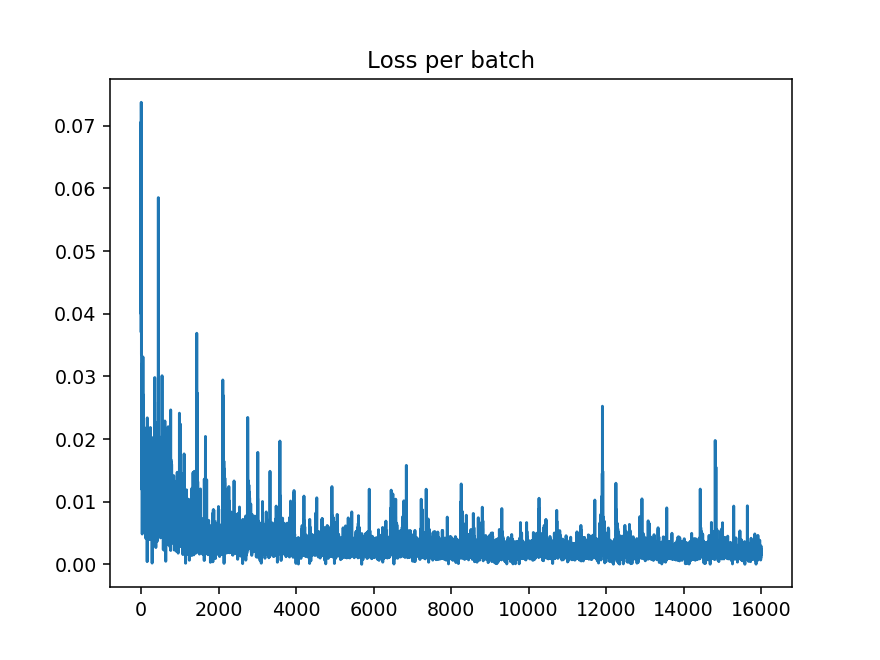

In [6]:
model = init_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_X, train_Y, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_X, test_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=20)
print(score)
plot_losses(history.losses)

In [7]:
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True shape: ' + str(test_Y[i]))
    print('Predicted shape: ' + str(model.predict(np.reshape(test_X[i], (1, 200))))+'\n')

Test 0
True shape: [0.4        0.39507534 0.4        0.37474388 0.36084521 0.35640261]
Predicted shape: [[0.34329113 0.3498186  0.3703127  0.37610564 0.37901786 0.40544036]]

Test 1
True shape: [0.1        0.09753767 0.09753767 0.1        0.09876883 0.1       ]
Predicted shape: [[0.11453229 0.11547968 0.12030026 0.1306836  0.12487046 0.12668617]]

Test 2
True shape: [0.2        0.21968701 0.25051498 0.3        0.338636   0.4       ]
Predicted shape: [[0.23842645 0.22216994 0.21865794 0.21651354 0.21647248 0.22223541]]

Test 3
True shape: [0.4        0.41826582 0.44988746 0.5        0.53873909 0.6       ]
Predicted shape: [[0.4933923  0.4659992  0.43970564 0.43069237 0.392293   0.36354813]]

Test 4
True shape: [0.1        0.09876883 0.1        0.1        0.09629116 0.09510565]
Predicted shape: [[0.11452839 0.11547604 0.12029648 0.13067964 0.12486569 0.12668127]]

Test 5
True shape: [0.2963065  0.3        0.30864787 0.32607652 0.35485183 0.4       ]
Predicted shape: [[0.26308483 0.261326

True shape: [0.09876883 0.1        0.13169178 0.2        0.19753767 0.2       ]
Predicted shape: [[0.11784083 0.11883315 0.12367681 0.13406545 0.12830563 0.13023748]]

Test 63
True shape: [0.3       0.2963065 0.3       0.2963065 0.3       0.2963065]
Predicted shape: [[0.253811   0.22750443 0.21603653 0.20850965 0.20155703 0.20695908]]

Test 64
True shape: [0.1        0.11723925 0.14600443 0.2        0.2        0.19753767]
Predicted shape: [[0.1189729  0.11999413 0.12462595 0.13162923 0.12643127 0.12868646]]

Test 65
True shape: [0.2        0.13169178 0.1        0.09753767 0.09753767 0.1       ]
Predicted shape: [[0.14596352 0.14524883 0.14914802 0.15037316 0.15062843 0.15436272]]

Test 66
True shape: [0.09510565 0.09629116 0.1        0.11723925 0.14600443 0.2       ]
Predicted shape: [[0.11480308 0.11575478 0.12057552 0.13096151 0.12514654 0.12697123]]

Test 67
True shape: [0.3        0.30864787 0.32607652 0.35485183 0.4        0.3       ]
Predicted shape: [[0.31533098 0.32932788 0.360

In [49]:
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True shape: ' + str(test_Y[i]))
    print('Predicted shape: ' + str(model.predict(np.reshape(test_X[i], (1, 200))))+'\n')
    

Test 0
True shape: [0.09876883 0.1        0.13169178 0.2        0.19258231 0.1902113 ]
Predicted shape: [[0.14291796 0.13878718 0.14108998 0.14678332 0.14327656 0.14059259]]

Test 1
True shape: [0.09876883 0.1        0.0907981  0.08506508 0.08191015 0.0809017 ]
Predicted shape: [[0.13644803 0.13222048 0.13440487 0.14040518 0.13673437 0.13343318]]

Test 2
True shape: [0.2        0.1        0.0907981  0.08506508 0.08191015 0.0809017 ]
Predicted shape: [[0.14865404 0.14462388 0.14754912 0.15315759 0.14963385 0.14749983]]

Test 3
True shape: [0.5        0.45246718 0.42269179 0.40597245 0.4        0.39507534]
Predicted shape: [[0.41662487 0.42575783 0.43479764 0.47176093 0.4824425  0.49359637]]

Test 4
True shape: [0.5        0.43701602 0.39680225 0.37174803 0.35796048 0.35355339]
Predicted shape: [[0.40207815 0.4130103  0.44638693 0.49718252 0.48815945 0.4668016 ]]

Test 5
True shape: [0.2963065  0.3        0.25606269 0.22825356 0.21057    0.2       ]
Predicted shape: [[0.3927908  0.391007

In [45]:
model.predict(np.reshape(test_X[1], (1, 200)))

array([[0.14291796, 0.13878718, 0.14108998, 0.14678332, 0.14327656,
        0.14059259]], dtype=float32)

In [40]:
test_Y[1]

array([0.09876883, 0.1       , 0.13169178, 0.2       , 0.19258231,
       0.1902113 ])

In [44]:
np.savetxt('Prediction/2019_7_15_1_p.txt', predict_Y[0])